# 여러 지수평활법과 ETS 비교 실습

여태까지 이동평균평활 이후 우리가 배웠던 지수평활법은 **단순지수평활법(simple exponential smoothing)**과 **홀트의선형지수평활법(holt's linear trend method)**와 **홀트의계절지수평활법(holt winters' seasonal method)**가 있었습니다.<br/>
각각을 통계적 기법을 적용한 **ETS 모형**과 비교해보는 실습을 진행합니다.<br/>

ETS는 앞서 배웠던 분해분석 위주의 고전모형들과는 다르게 확률적 방법의 시간영역의 한 모형으로 분류됩니다.<br/>

실습에 주어진 조건은 아래와 같습니다.<br/>
* holt의 감쇠효과 또는 hw에서 가법/승법 선택은 분석자가 각자 판단해서 사용 가능
* 학습데이터와 테스트데이터를 바탕으로 RMSE 값을 비교분석하여 더 나은 모형을 선정
* 학습데이터에서 각 모형의 파라미터 값들은 최적화된 값을 찾아서 사용 가능
* 실제값과 적합된 값, 예측값을 구분하여 차트로 표현하기

Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'fpp2' was built under R version 3.6.3"
Loading required package: ggplot2

Loading required package: fma

Warning message:
"package 'fma' was built under R version 3.6.3"
Loading required package: expsmooth

Warning message:
"package 'expsmooth' was built under R version 3.6.3"



Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = oil_train_data) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 192.1571 

  sigma:  58.4811

     AIC     AICc      BIC 
362.6458 363.5347 366.9478 

Error measures:
                   ME     RMSE      MAE      MPE     MAPE      MASE      ACF1
Training set 8.513001 56.56321 42.74775 1.237038 13.11413 0.9677709 0.1888919

Forecasts:
     Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
2001       456.0338 381.0872 530.9804 341.41282 570.6547
2002       456.0338 350.0486 562.0190 293.94338 618.1241
2003       456.0338 326.2311 585.8364 257.51771 654.5498
2004       456.0338 306.1518 605.9157 226.80909 685.2584
2005       456.0338 288.4615 623.6060 199.75407 712.3134
2006       456.0338 272.4681 639.5994 175.29436 736.7731
2007       456.0338 257.7607 654.3068 152.80127 759.2662
2008       456.0338 244.0713 667.9962 131.86518 780.2023
2009       456

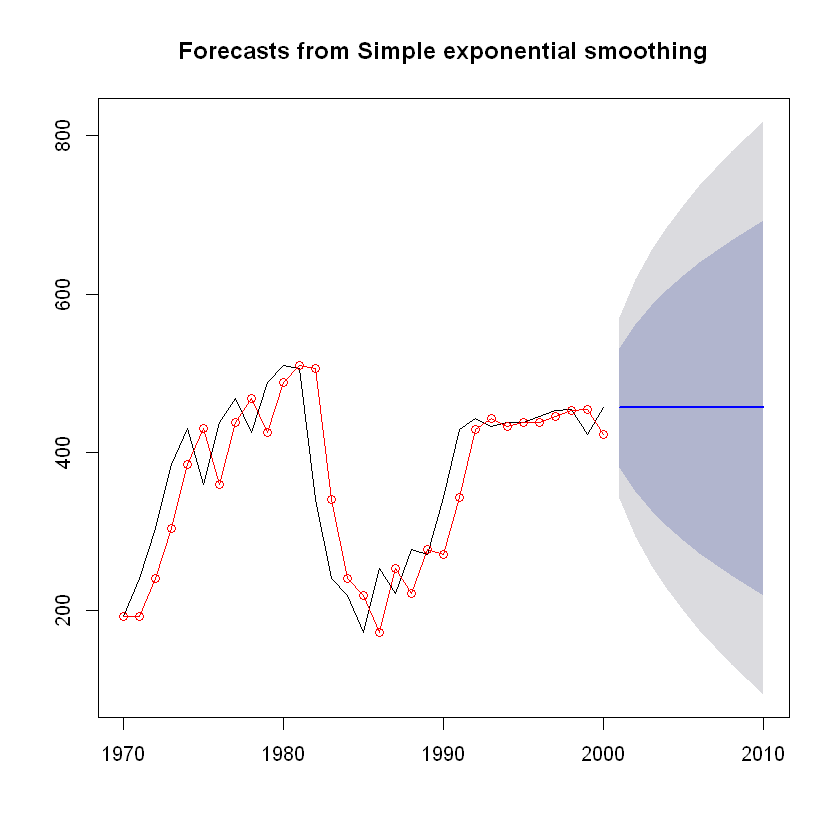

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,8.513001,56.56321,42.74775,1.237038,13.114133,0.9677709,0.1888919,NA
Test set,25.140017,39.27867,34.43732,4.836675,6.997886,0.7796302,0.4280158,1.24966


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,8.514241,56.56321,42.74899,1.237683,13.114778,0.9677990,0.1889093,NA
Test set,25.140020,39.27868,34.43733,4.836676,6.997887,0.7796303,0.4280158,1.24966


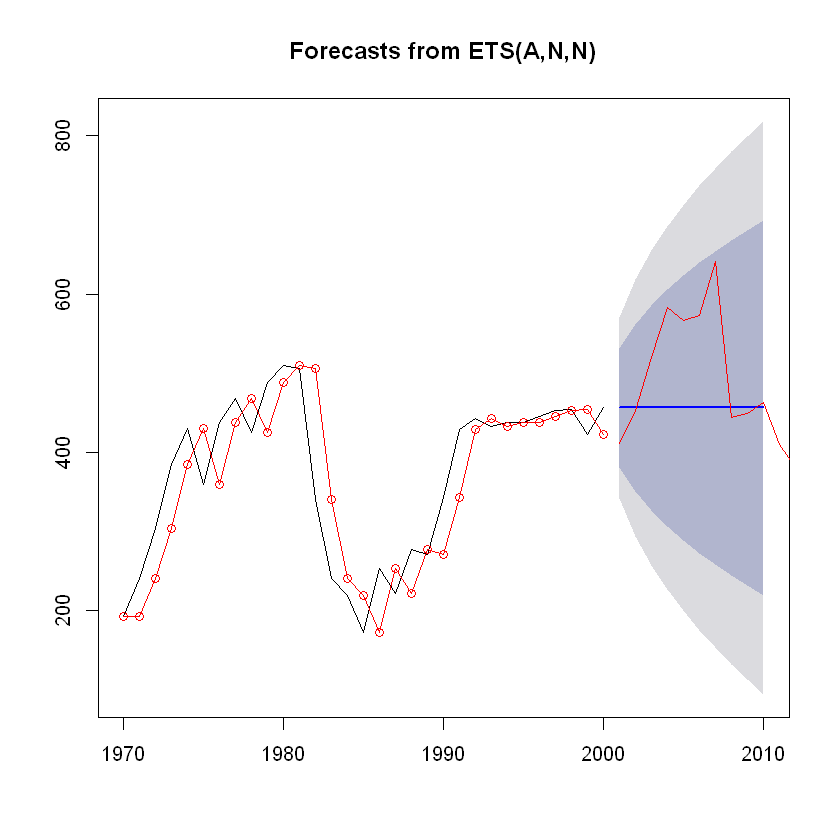

In [1]:
library(forecast)
library(fpp2)


# data for ses() vs ets()
oil_train_data <- window(oil, start=1970, end=2000)
oil_test_data <- window(oil, start=2001, end=2013)

# fit ses
fit_ses_oil <- ses(oil_train_data)
summary(fit_ses_oil)

# forecast ses
fore_ses_oil <- forecast(fit_ses_oil)
plot(fore_ses_oil)
lines(fitted(fit_ses_oil), type="o", col="red")

# fit ets
fit_ets_oil <- ets(oil_train_data)
summary(fit_ets_oil)

# forecast ets
fore_ets_oil <- forecast(fit_ets_oil)
plot(fore_ets_oil)
lines(fitted(fit_ets_oil), type="o", col="red")
lines(simulate(fit_ets_oil, 12), col="red") # 한번 simulate


# 평가
accuracy(fore_ses_oil,oil_test_data)
accuracy(fore_ets_oil,oil_test_data)

앞서 먼저 해본 실습에서도 설명한 바와 같이 ETS의 인수를 ZZZ로 두었습니다. ETS의 세 인수는 순서대로 error, trend, seasonal term에 각각 해당합니다.<br/>
제가 이렇게 자동으로 최적 모형을 찾아주는 ZZZ로 둔 이유는 이렇습니다.<br/>

이 실습에서 이용하는 데이터들이 전부 해당 단원을 배울 때 "이런 데이터"에는 "이 모형이 적합하다"하고 배울 때 써먹었던 데이터들이기 때문에, 이 첫 번째 데이터인 oil의 경우 ses가 적합할 것 입니다.<br/>
실제로도 최적의 모형이 맞을지 확인해보기 위해서 <br/>일부러 자동으로 두었습니다.<br/>

window()함수를 이용해서 원하는 구간인 1970년\~2000년까지는 train 데이터로 두어 적합시키도록 합니다.<br/>
그리고 2001년\~2013년까지는 test 데이터로 둡니다.<br/>

어떤 모형으로든 적합시키기 이전에 원본 데이터를 가장 먼저 찍어보았습니다.<br/>

각 메소드에 대한 설명은 앞선 실습들에서 설명했으므로 생략합니다.<br/>

현재 ses 모형의 초기값과 알파값은 최적으로 찾도록 설정하고 호출하였기 때문에 + 앞전실습과는 데이터구간이 바뀌었으니 새롭게 확인해줄 필요가 있습니다. 적합시킨 모형을 요약해보면 각각 초기값이  192.1571, 알파값이 0.9999로 확인됩니다.<br/>

ses 모형의 RMSE 값은 56.56321로 확인되었습니다.<br/>

이후 ETS 모형으로 적합시키는데, 위에서 설명했듯이 최적값을 자동으로 찾도록 호출하였지요.<br/>
마찬가지로 ANN모델이 확인되었네요, ses 모델에 에러텀만 additive하게 설정된 모형으로 적합시킨 것입니다!<br/>

심지어는 주관적이기는 하나 알파값(0.9999)과 초기값(192.1187)도 크게 차이가 안나요! 에러텀이 들어갔으니 아예 차이가 안날 수는 없겠지요.<br/>

ETS 모형의 RMSE값은 56.56321입니다.<br/>
ses모형으로 적합시켰을 때나 ets 모형으로 적합시켰을 때의 결과가 거의 대동소이하다는 것을 알 수 있습니다.<br/>

하지만 테스트 시의 RMSE 도 확인해볼 필요가 있습니다.<br/>
ses 모형은 39.27867로, ets는 39.27868로 확인되었습니다.<br/>

미세한 차이지만 ses 모형이 테스트 시에 더 적은 오차를 갖는다는 것을 알 수 있습니다.<br/>

그런데 이 실습에서는 신기한 현상이 나왔습니다.<br/>
바로 학습 시보다 테스트 시의 RMSE가 더 작다는 것이죠.<br/>
이런 경우는 흔히 볼 수 있는 사례가 아니니 기억에 남을 것 같습니다.<br/>


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = ausair_train_data) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 1e-04 

  Initial states:
    l = 9.9867 
    b = 1.1251 

  sigma:  1.736

     AIC     AICc      BIC 
146.3696 148.7696 153.5396 

Error measures:
                       ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.006195664 1.620146 1.118594 -1.591612 5.584888 0.7440821
                  ACF1
Training set 0.0473453

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2006       45.78222 43.55743 48.00702 42.37970 49.18475
2007       46.90732 43.76099 50.05365 42.09542 51.71921
2008       48.03241 44.17883 51.88599 42.13887 53.92595
2009       49.15751 44.70759 53.60742 42.35195 55.96306
2010       50.28260 45.30722 55.25798 42.67341 57.89179
2011       51.40769 45.95718 56.85820 43.07186 59.74353
2012       52.53279 46.64528 58.42029 43.52863 61.53695
2013       53.65788 47.36357 59.95219 

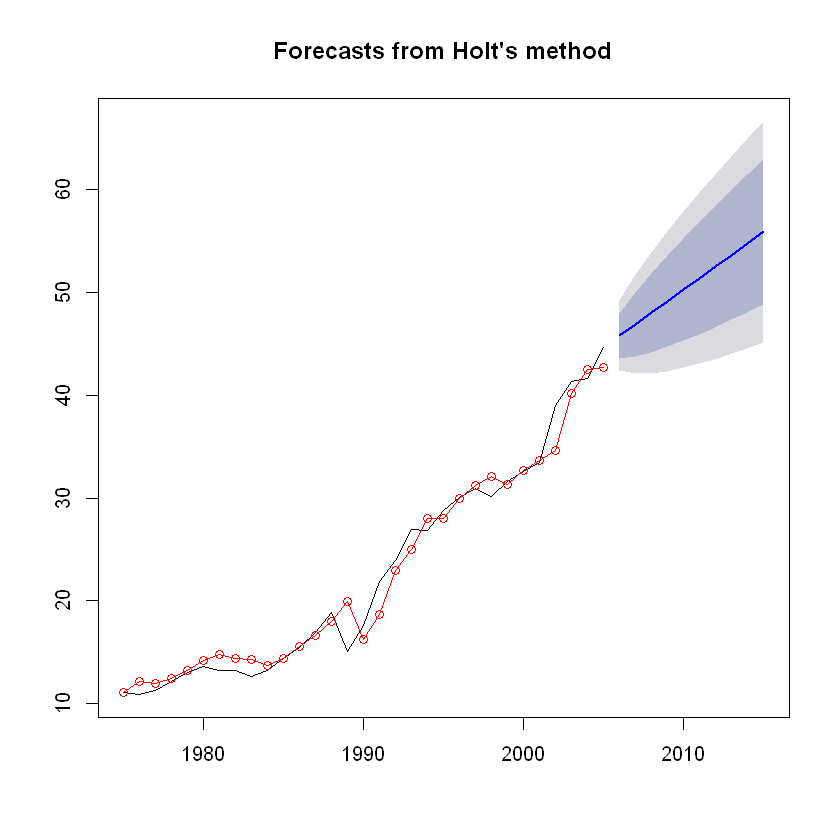

ETS(M,A,N) 

Call:
 ets(y = ausair_train_data) 

  Smoothing parameters:
    alpha = 0.9433 
    beta  = 1e-04 

  Initial states:
    l = 10.097 
    b = 0.7781 

  sigma:  0.0812

     AIC     AICc      BIC 
143.5966 145.9966 150.7666 

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.3526798 1.664772 1.147784 0.2435318 5.407749 0.7634988
                   ACF1
Training set 0.09926494


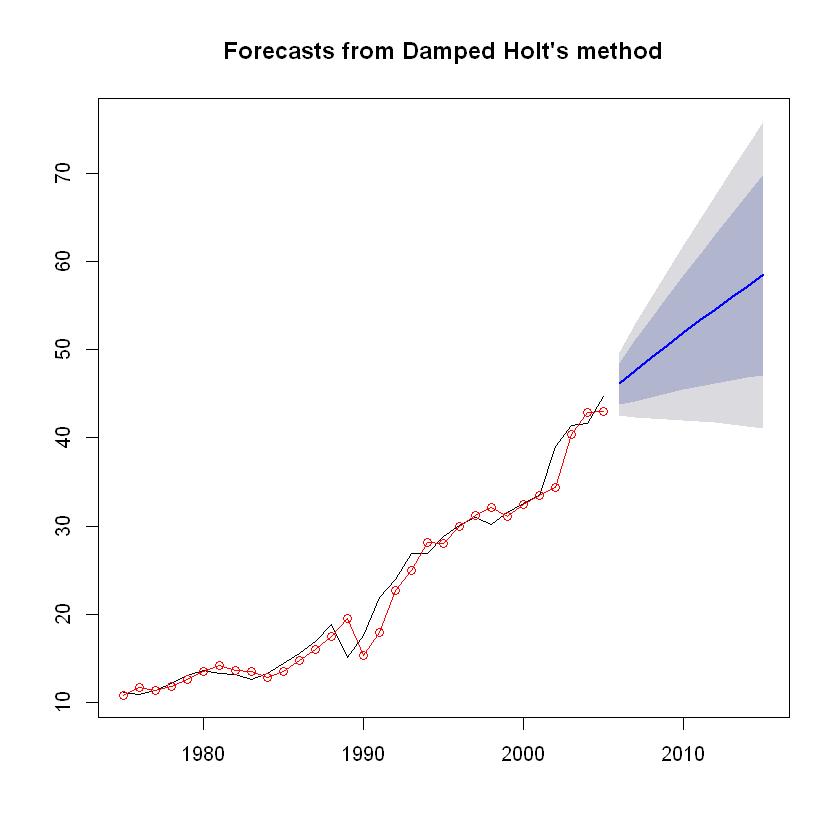

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.006195664,1.620146,1.118594,-1.591612,5.584888,0.7440821,0.0473453,NA
Test set,8.520156928,10.199976,8.520157,13.223788,13.223788,5.6675574,0.6966815,2.169414


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.3733363,1.665342,1.163677,1.075389,5.557124,0.7740711,-0.04098742,NA
Test set,6.8778642,8.481858,6.975599,10.574985,10.770349,4.6401267,0.67883776,1.803973


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.3526798,1.664772,1.147784,0.2435318,5.407749,0.7634988,0.09926494,NA
Test set,10.5505752,12.401981,10.550575,16.4740364,16.474036,7.0181795,0.71169850,2.63408


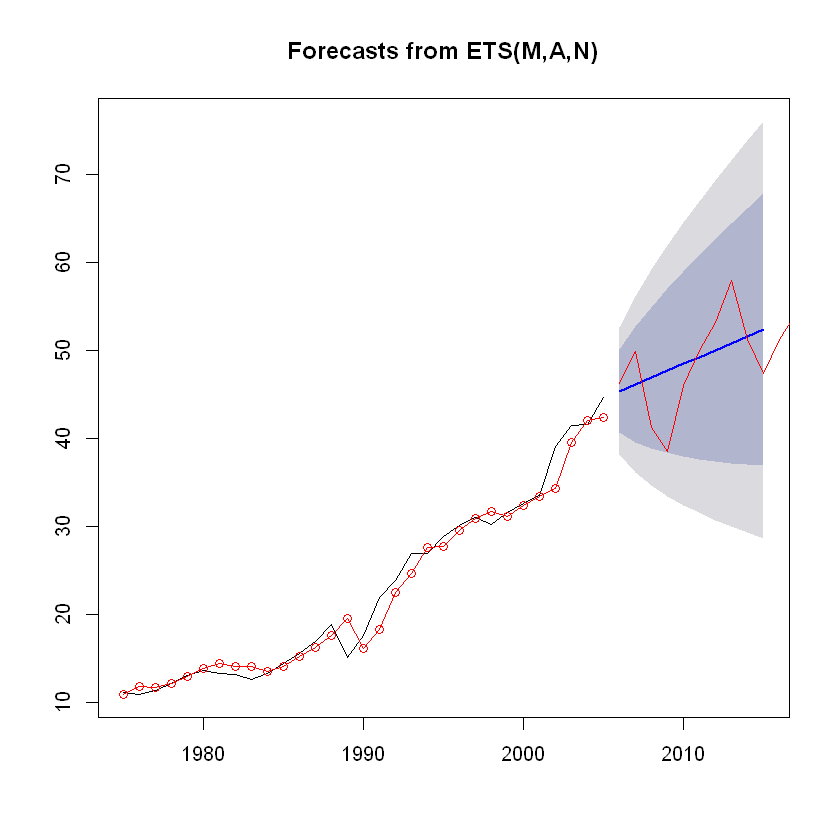

In [2]:
library(forecast)
library(fpp2)


# data for holt() vs ets()
ausair_train_data <- window(ausair, start=1975, end=2005)
ausair_test_data <- window(ausair, start=2006, end=2016)

# fit holt_no damped
fit_holt_ausair_1 <- holt(ausair_train_data)
summary(fit_holt_ausair_1)

# fit holt_damped
fit_holt_ausair_2 <- holt(ausair_train_data, damped=TRUE)
summary(fit_holt_ausair_2)

# forecast holt_no damped
fore_holt_ausair_1 <- forecast(fit_holt_ausair_1)
plot(fore_holt_ausair_1)
lines(fitted(fit_holt_ausair_1), type="o", col="red")

# forecast holt_damped
fore_holt_ausair_2 <- forecast(fit_holt_ausair_2)
plot(fore_holt_ausair_2)
lines(fitted(fit_holt_ausair_2), type="o", col="red")

# fit ets
fit_ets_ausair <- ets(ausair_train_data)
summary(fit_ets_ausair)

# forecast ets
fore_ets_ausair <- forecast(fit_ets_ausair)
plot(fore_ets_ausair)
lines(fitted(fit_ets_ausair), type="o", col="red")
lines(simulate(fit_ets_ausair, 12), col="red") # 한번 simulate


# 평가
accuracy(fore_holt_ausair_1,ausair_test_data)
accuracy(fore_holt_ausair_2,ausair_test_data)
accuracy(fore_ets_ausair,ausair_test_data)

이번엔 홀트의 선형지수 평활과 ets 두 메소드 간의 비교 실습입니다.<br/>
마찬가지의 이유로 ETS의 인수를 ZZZ로 두었습니다.<br/>

window()함수를 이용해서 원하는 구간인 1975년\~2006년까지는 train 데이터로 두어 적합시키도록 합니다.<br/>
그리고 2001년\~2013년까지는 test 데이터로 둡니다.<br/>

어떤 모형으로든 적합시키기 이전에 원본 데이터를 가장 먼저 찍어보았습니다.<br/>

마찬가지로 앞전 실습에서 모형에 대한 설명은 여러차례 되었으므로 생략하며, damped를 적용했을 때와 적용하지 않았을 때 모두 비교해보겠습니다.<br/>

적합된 홀트 선형지수평활 모형(no damped)을 요약해보았습니다. 이 모형의 RMSE 값은 1.620146으로 확인되었습니다.<br/>

그 다음 적합된 홀트 선형지수평활 모형(damped) 역시 요약해보았습니다. RMSE값은 1.665342로 잔차값이 조금 늘었네요. 적합시킬 구간은 거의 단순하게 지속적으로 상승하는 구간이다 보니까 잔차가 늘어보일 수 있을 듯합니다.<br/>

이후 ETS 모형으로 적합시키는데, 위에서 설명했듯이 최적값을 자동으로 찾도록 호출하였지요.<br/>
이번에도 역시 MAN모델이 확인되었네요, 홀트 선형 모형에 에러텀만 multiplicative하게 설정된 모형으로 적합시킨 것입니다!<br/>

ETS 모형의 RMSE값은 1.664772입니다.<br/>
RMSE값만 보아서는 에러텀이 없는 홀트 선형지수 모형(no damped)이 가장 잘 적합된 것이라고 판단할 수는 있겠지만, 과적합 문제를 피해갈 수 있을지 여부까지 확인을 위해서 test 데이터를 가지고 accuracy를 측정합니다.<br/>

흥미로운 결과가 나왔습니다.<br/>
홀트 선형지수평활 모형(no damped)의 예측 RMSE는 10.199976로 확인 되며, 홀트 선형지수평활 모형(damped)의 예측 RMSE는 8.481858으로 확인되었습니다.<br/>
또 ETS 모형의 RMSE값은 12.401981로 확인되어 적합 RMSE 잔차하고는 상당히 다른 결과를 낳았네요.<br/>

적합 측도가 낮다고 해서 예측력이 좋다고 말할 수 없으며 이런 경우에는 오히려 train 데이터에 과적합된 경향이 있다는 평가를 할 수 있습니다. 따라서 최적의 모형은 홀트 선형지수 평활 모형(damped)입니다.<br/>


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = austourists_train_data, seasonal = "additive") 

  Smoothing parameters:
    alpha = 0.2506 
    beta  = 1e-04 
    gamma = 0.4321 

  Initial states:
    l = 27.5704 
    b = 0.4855 
    s = 2.0887 -0.6846 -6.4459 5.0418

  sigma:  2.4281

     AIC     AICc      BIC 
334.1457 338.0587 352.3739 

Error measures:
                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.01600417 2.248029 1.694974 -0.7700315 4.824783 0.6226225
                   ACF1
Training set 0.04017263

Forecasts:
        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2014 Q1       67.71910 64.60730 70.83089 62.96001 72.47818
2014 Q2       43.71151 40.50337 46.91964 38.80509 48.61792
2014 Q3       54.92372 51.62199 58.22545 49.87416 59.97329
2014 Q4       58.69967 55.30685 62.09250 53.51080 63.88855
2015 Q1       69.66141 65.65756 73.66526 63.53805 75.78477
2015 Q2       

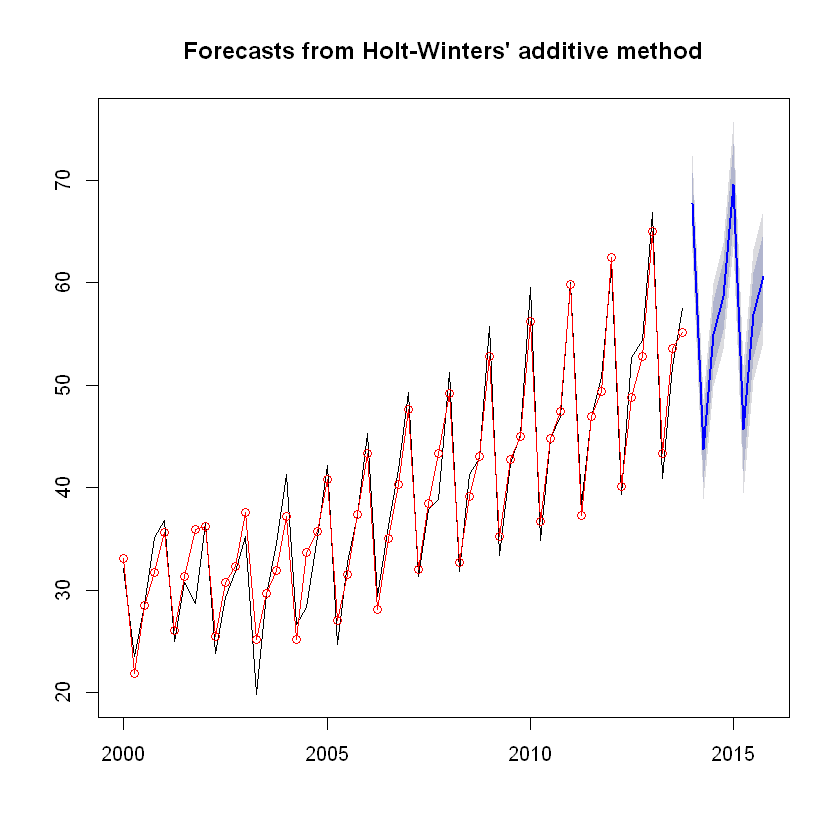

ETS(A,A,A) 

Call:
 ets(y = austourists_train_data) 

  Smoothing parameters:
    alpha = 0.2506 
    beta  = 1e-04 
    gamma = 0.4321 

  Initial states:
    l = 27.5703 
    b = 0.4854 
    s = 2.0887 -0.6848 -6.4457 5.0418

  sigma:  2.4281

     AIC     AICc      BIC 
334.1457 338.0587 352.3739 

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.01611745 2.248029 1.694969 -0.769732 4.824727 0.6226207
                   ACF1
Training set 0.04017056


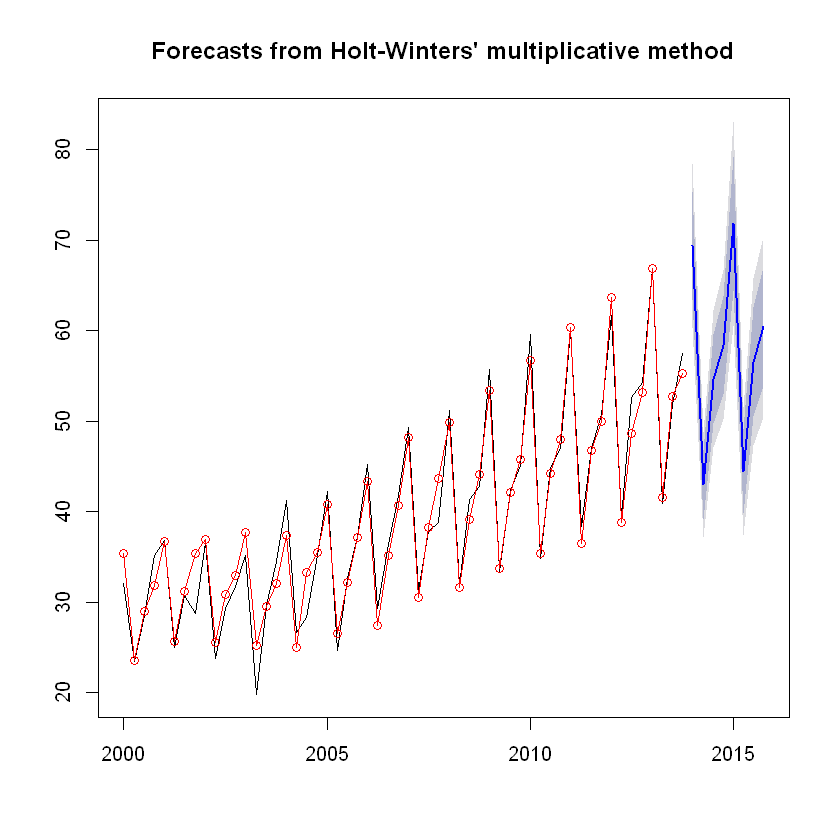

ETS(M,A,M) 

Call:
 ets(y = austourists_train_data, model = "MAM") 

  Smoothing parameters:
    alpha = 0.3223 
    beta  = 1e-04 
    gamma = 0.1951 

  Initial states:
    l = 27.9164 
    b = 0.4511 
    s = 1.059 0.9461 0.7925 1.2025

  sigma:  0.0654

     AIC     AICc      BIC 
336.8985 340.8116 355.1267 

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.1272526 2.132348 1.579408 -0.2918021 4.467637 0.5801713
                   ACF1
Training set 0.02425731


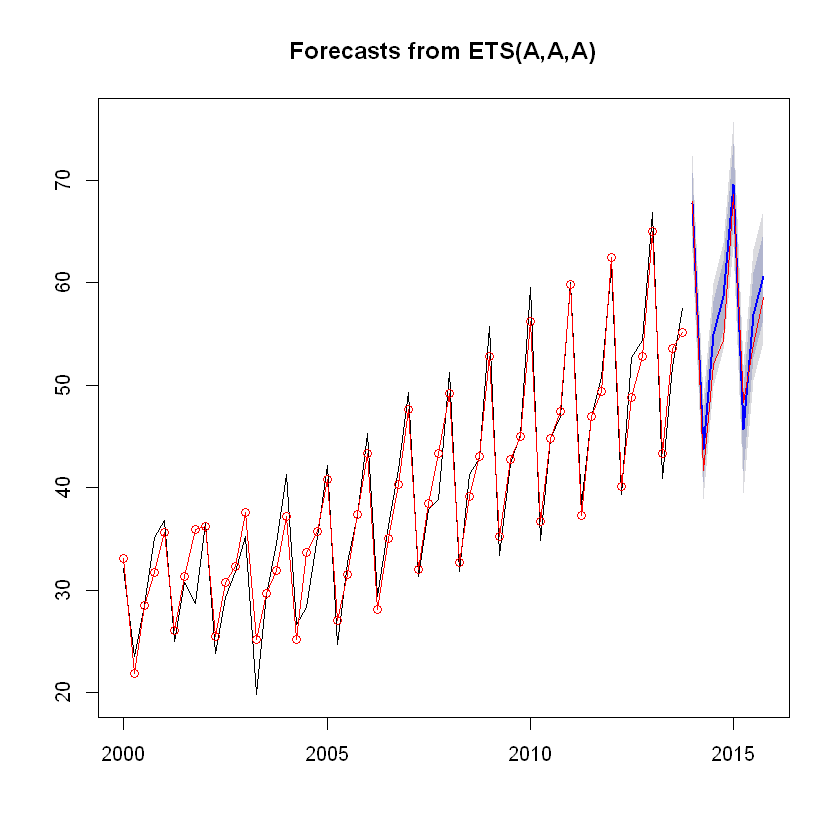

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.01600417,2.248029,1.694974,-0.7700315,4.824783,0.6226225,0.04017263,NA
Test set,1.64223167,3.003009,2.462454,2.5775210,3.974891,0.9045444,0.49578563,0.2129111


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.04120561,2.145898,1.551358,-0.8266727,4.440420,0.5698674,0.1093837,NA
Test set,1.54112579,3.251422,2.583929,2.6482491,4.246379,0.9491665,0.4227807,0.2140933


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.01611745,2.248029,1.694969,-0.769732,4.824727,0.6226207,0.04017056,NA
Test set,1.64246352,3.003210,2.462588,2.577913,3.975101,0.9045939,0.49579241,0.2129274


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.1272526,2.132348,1.579408,-0.2918021,4.467637,0.5801713,0.02425731,NA
Test set,1.6437781,3.385200,2.707598,2.8155332,4.445871,0.9945943,0.43513528,0.2256156


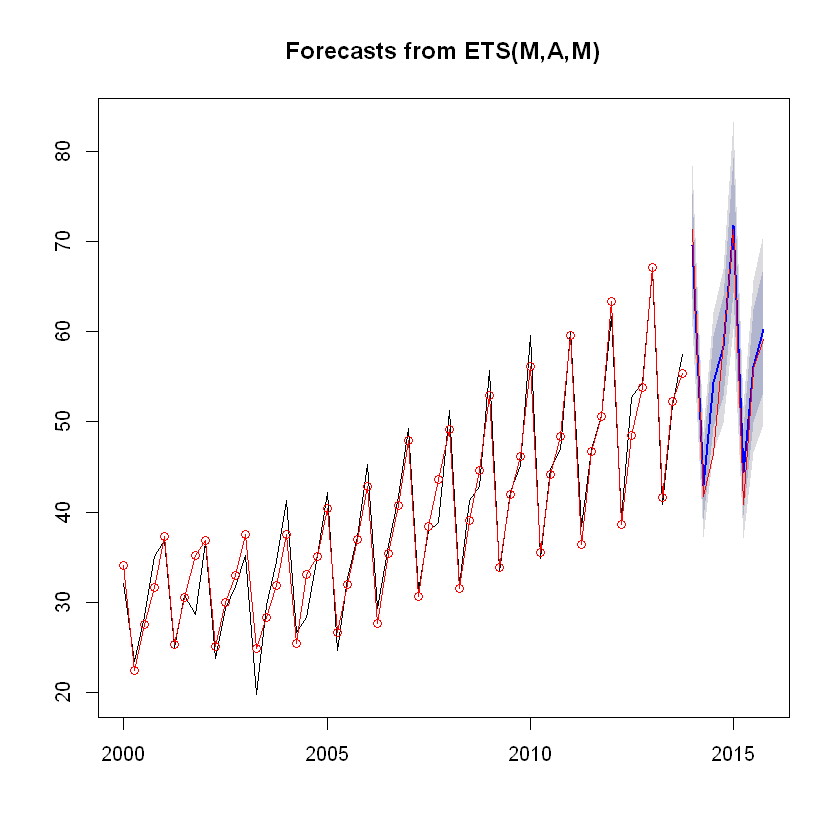

In [3]:
library(forecast)
library(fpp2)

# data for hw() vs ets()
austourists_train_data <- window(austourists, start=c(2000,1), end=c(2013,4))
austourists_test_data <- window(austourists, start=c(2014,1), end=c(2015,4))

# fit hw_additive
fit_hw_austourist_1 <- hw(austourists_train_data, seasonal="additive")
summary(fit_hw_austourist_1)

# fit hw_multiplicative
fit_hw_austourist_2 <- hw(austourists_train_data, seasonal="multiplicative")
summary(fit_hw_austourist_2)

# forecast hw_additive
fore_hw_austourist_1 <- forecast(fit_hw_austourist_1)
plot(fore_hw_austourist_1)
lines(fitted(fit_hw_austourist_1), type="o", col="red")

# forecast hw_additive
fore_hw_austourist_2 <- forecast(fit_hw_austourist_2)
plot(fore_hw_austourist_2)
lines(fitted(fit_hw_austourist_2), type="o", col="red")

# fit ets_aaa
fit_ets_austourist_1 <- ets(austourists_train_data)
summary(fit_ets_austourist_1)

# forecast ets_aaa
fore_ets_austourist_1 <- forecast(fit_ets_austourist_1)
plot(fore_ets_austourist_1)
lines(fitted(fit_ets_austourist_1), type="o", col="red")
lines(simulate(fit_ets_austourist_1, 8), col="red") # 한번 simulate


# fit ets_mam
fit_ets_austourist_2 <- ets(austourists_train_data, model="MAM")
summary(fit_ets_austourist_2)

# forecast ets_aaa
fore_ets_austourist_2 <- forecast(fit_ets_austourist_2)
plot(fore_ets_austourist_2)
lines(fitted(fit_ets_austourist_2), type="o", col="red")
lines(simulate(fit_ets_austourist_2, 8), col="red") # 한번 simulate


# 평가
accuracy(fore_hw_austourist_1,austourists_test_data)
accuracy(fore_hw_austourist_2,austourists_test_data)
accuracy(fore_ets_austourist_1,austourists_test_data)
accuracy(fore_ets_austourist_2,austourists_test_data)

이번엔 홀트의 계절지수 평활과 ets 두 메소드 간의 비교 실습입니다.<br/>
마찬가지의 이유로 ETS의 인수를 ZZZ로 두었습니다.<br/>

window()함수를 이용해서 원하는 구간인 2000년\~2014년까지는 train 데이터로 두어 적합시키도록 합니다.<br/>
그리고 2015년\~는 test 데이터로 둡니다.<br/>

마찬가지로 앞전 실습에서 이 모형들에 대한 설명은 여러 차례 되었기 때문에 생략하며, 승법모형과 가법모형을 모두 적합시켜 비교해보겠습니다.<br/>

어떤 모형으로든 적합시키기 이전에 원본 데이터를 가장 먼저 찍어보았습니다.<br/>

적합된 홀트 계절지수평활 모형(가법메소드)을 요약해보았습니다. 이 모형의 적합 시 RMSE 값은 2.248029으로 확인되었습니다.<br/>

그 다음 적합된 홀트 계절지수평활 모형(승법메소드) 역시 요약해보았습니다. 적합 시 RMSE값은 2.145898로 확인되었습니다.<br/>

이후 ETS 모형으로 적합시키는데, 위에서 설명했듯이 최적값을 자동으로 찾도록 호출하였지요.<br/>
신기하게도 이번에는 데이터 관측 구간이 달라져서 MAM이아닌 AAA가 최적의 모형이라고 나왔네요.<br/>
정확한 평가를 위하여 MAM 모형으로 한 번 더 테스트를 진행하도록 합니다.<br/>
AAA는 홀트 계절지수 모형(additive)에 에러텀도 additive로 추가한 모형이며, MAM은 홀트 계절지수 모형에 에러텀만 multiplicative하게 설정된 모형으로 적합시킨 것입니다!<br/>

ETS(AAA) 모형의 적합 시 RMSE값은 2.248029입니다.<br/>
또한 ETS(MAM) 모형의 적합 시 RMSE값은 2.132348입니다.<br/>
적합 시 RMSE값만 보아서는 ETS(MAM)이 가장 좋은 모형같아 보입니다.<br/>

테스트 시에는 어떤지도 확인해보겠습니다.<br/>
테스트 시 홀트 계절지수평활 모형(가법메소드)의 RMSE는 3.003009이며, 홀트 계절지수평활 모형(승법메소드)의 RMSE값은 3.251422로 확인되었습니다.<br/>
ETS(AAA) 모형의 테스트 시 RMSE값은 3.003210으로 확인되었으며, ETS(MAM)의 테스트 시 RMSE값은 3.385200으로 확인되었습니다.<br/>

이번에도 역시 흥미롭게도 전혀 다른 결과가 나왔는데요, 적합은 ETS(MAM)이 가장 잘 되었지만, 테스트를 보아서는 홀트 계절지수평활 모형(가법메소드)가 가장 오차가 적네요.<br/>
홀트의 선형지수 모형과의 비교실습에서 분석한 것처럼 저는 test에서 좋은 점수를 받은 홀트 계절지수평활 모형(가법메소드)를 가장 적합한 모형이라고 평가하겠습니다.<br/>